# Pseudo-Population Extrapolation: An Example with Basketball Rosters

The following notebook demonstrates the use of PPE on the roster of the 2018 Dallas Mavericks.

http://www.espn.com/nba/team/roster/_/name/dal/dallas-mavericks


In [1]:
# Load the roster information
import pandas as pd

raw = pd.read_csv('C:/Users/ahancock/Desktop/SMU/7349 - Data and Network Security/Term Project/Basketball_Raw.csv')

In [3]:
# A display of the raw data table.
raw

,NAME,POS,AGE,HT (in),WT (lb)
0,J.J. Barea,PG,33,72,185
1,Harrison Barnes,SF,25,80,225
2,Kyle Collinsworth,PG,26,78,210
3,Seth Curry,SG,27,74,185
4,Yogi Ferrell,PG,24,72,180
5,Dorian Finney-Smith,SF,24,80,220
6,Aaron Harrison,SG,23,78,210
7,Scotty Hopson,SG,28,79,230
8,Jalen Jones,SF,24,79,220
9,Maximilian Kleber,PF,26,83,220


You can see from the above table that we have fields for name, position, age, height, and weight. It is the purpose of pesudo-population extraplation to maintain the statistical integrity of the underlying data while making it impossible to match it to an individual user, in this case the player.

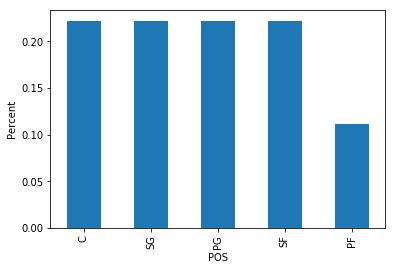

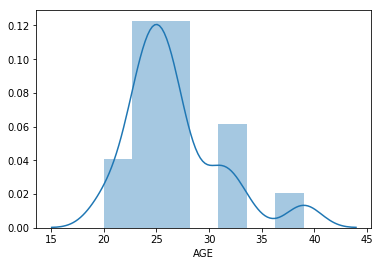

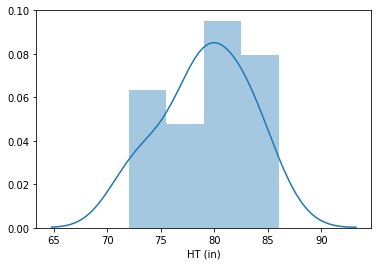

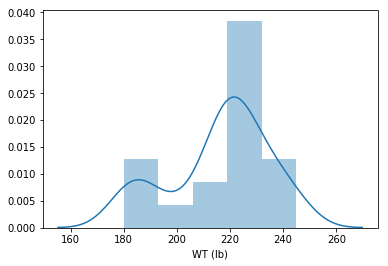

In [74]:
# Look at the underlying statistics of the raw set
import matplotlib.pyplot as plt
import seaborn as sns

nested_counts = raw['POS'].value_counts(normalize=True).plot(kind='bar')
nested_counts.set_xlabel('POS')
nested_counts.set_ylabel('Percent')
plt.show()

sns.distplot(raw['AGE'])
plt.show()

sns.distplot(raw['HT (in)'])
plt.show()

sns.distplot(raw['WT (lb)'])
plt.show()

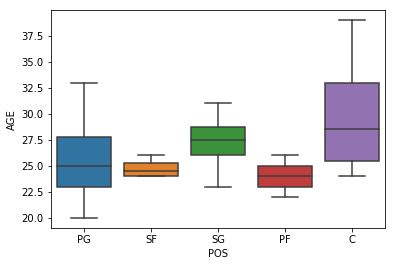

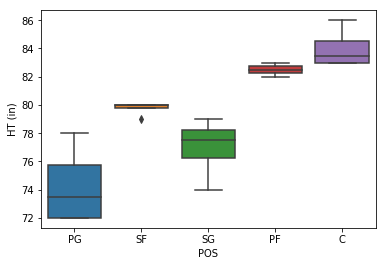

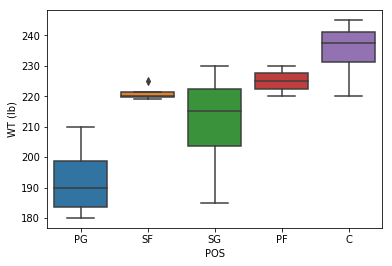

In [75]:
sns.boxplot(x='POS', y='AGE', data=raw)
plt.show()
sns.boxplot(x='POS', y='HT (in)', data=raw)
plt.show()
sns.boxplot(x='POS', y='WT (lb)', data=raw)
plt.show()

### Pseudo-Population Extrapolation

In [119]:
#To begin PPE, we first need to determin which fields we will be using for our nested indices. 
#In this case, we will be indexing on the position field. So when we extrapolate, the following percentages will be maintained:

heirarchy_index = raw['POS'].value_counts(normalize=True)
print(heirarchy_index)

#The other features will be populated with the following ranges:

age_range = raw.groupby('POS')['AGE'].agg(lambda x: str(x.min()) + '-' + str(x.max())).reset_index()
height_range = raw.groupby('POS')['HT (in)'].agg(lambda x: str(x.min()) + '-' + str(x.max())).reset_index()
weight_range = raw.groupby('POS')['WT (lb)'].agg(lambda x: str(x.min()) + '-' + str(x.max())).reset_index()

print(age_range)
print(height_range)
print(weight_range)

C     0.222222
SG    0.222222
PG    0.222222
SF    0.222222
PF    0.111111
Name: POS, dtype: float64
  POS    AGE
0   C  24-39
1  PF  22-26
2  PG  20-33
3  SF  24-26
4  SG  23-31
  POS HT (in)
0   C   83-86
1  PF   82-83
2  PG   72-78
3  SF   79-80
4  SG   74-79
  POS  WT (lb)
0   C  220-245
1  PF  220-230
2  PG  180-210
3  SF  219-225
4  SG  185-230


Now that we have our hierarchy and range constraints, we can extrapolate

### Extrapolation

In [ ]:
ppe_df = pd.DataFrame(data= , columns='POS')

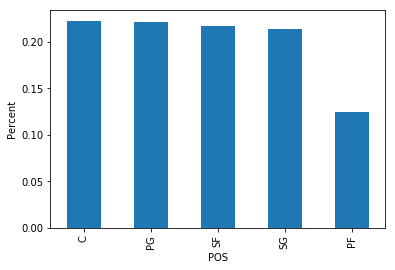

In [168]:
# Create values for position
import numpy as np

pos_choices = ['C','SG','PG','SF','PF']
pos_weights = [0.22, 0.22, 0.22, 0.22, 0.12] # PF weight changed to 0.12 so weights will sum to 1


ppe_pos = []
for x in range(0,10000):
    ppe_pos.append(np.random.choice(pos_choices, p=pos_weights))

ppe_df = pd.DataFrame({'POS':ppe_pos})

nested_counts = ppe_df['POS'].value_counts(normalize=True).plot(kind='bar')
nested_counts.set_xlabel('POS')
nested_counts.set_ylabel('Percent')
plt.show()

In [176]:
ppe_df['POS'].value_counts()

C     2228
PG    2214
SF    2173
SG    2144
PF    1241
Name: POS, dtype: int64

In [184]:
# Add columns to be filled
ppe_df['AGE'] = ""
ppe_df['HT (in)'] = ""
ppe_df['WT (lb)'] = ""

ppe_df.head()

In [245]:
# Populate ranges for age, height, and range
for index, row in ppe_df.iterrows():
    if row['POS'] == 'C':
        row['AGE'] = randint(24,39)
        row['HT (in)'] = randint(83,86)
        row['WT (lb)'] = randint(220,245)
    if row['POS'] == 'PF':
        row['AGE'] = randint(22,26)
        row['HT (in)'] = randint(82,83)
        row['WT (lb)'] = randint(220,230)
    if row['POS'] == 'PG':
        row['AGE'] = randint(20,33)
        row['HT (in)'] = randint(72,78)
        row['WT (lb)'] = randint(180,210)
    if row['POS'] == 'SF':
        row['AGE'] = randint(24,26)
        row['HT (in)'] = randint(79,80)
        row['WT (lb)'] = randint(219,225)
    if row['POS'] == 'SG':
        row['AGE'] = randint(23,31)
        row['HT (in)'] = randint(74,79)
        row['WT (lb)'] = randint(185,230)

C:\Users\ahancock\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


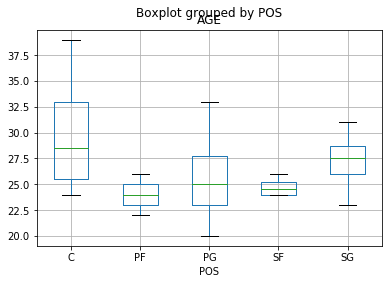

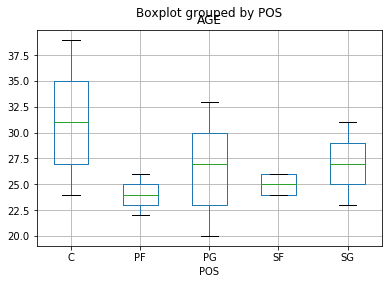

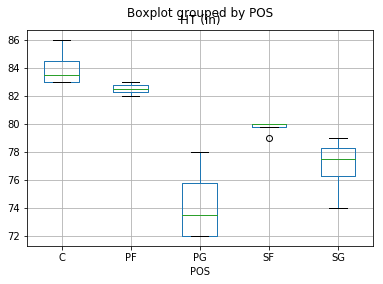

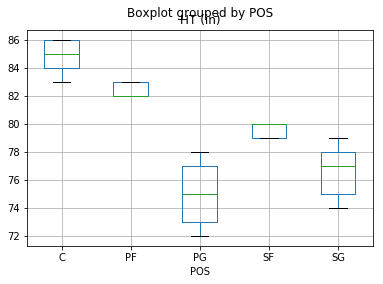

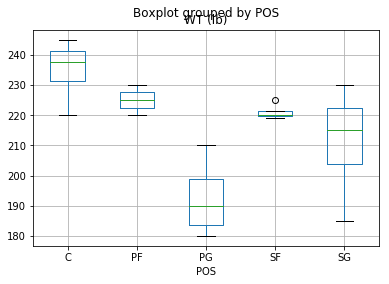

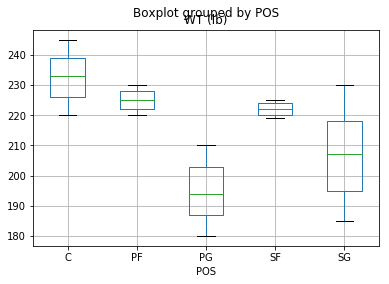

In [250]:
raw.boxplot(column='AGE',by='POS')
plt.show()
ppe_df.boxplot(column='AGE',by='POS')
plt.show()
raw.boxplot(column='HT (in)',by='POS')
plt.show()
ppe_df.boxplot(column='HT (in)',by='POS')
plt.show()
raw.boxplot(column='WT (lb)',by='POS')
plt.show()
ppe_df.boxplot(column='WT (lb)',by='POS')
plt.show()